# Import Libraries

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

from sklearn.metrics import confusion_matrix

# Load and preprocess the MNIST dataset


In [2]:
minst = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = minst.load_data()

# Reshape and normalize the data


In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the LeNet-5 model architecture


In [4]:
model = Sequential([
    Conv2D(filters=6, strides=(1, 1), kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1), padding='same'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=16, strides=(1, 1), kernel_size=(5, 5), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])

C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model


In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8999 - loss: 0.3427 - val_accuracy: 0.9541 - val_loss: 0.1543
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9630 - loss: 0.1214 - val_accuracy: 0.9733 - val_loss: 0.0906
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9765 - loss: 0.0769 - val_accuracy: 0.9784 - val_loss: 0.0685
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.9806 - val_loss: 0.0619
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9858 - loss: 0.0453 - val_accuracy: 0.9849 - val_loss: 0.0497
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9884 - loss: 0.0364 - val_accuracy: 0.9837 - val_loss: 0.0494
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.9859 - val_loss: 0.0445
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9923 - loss: 0.0248 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


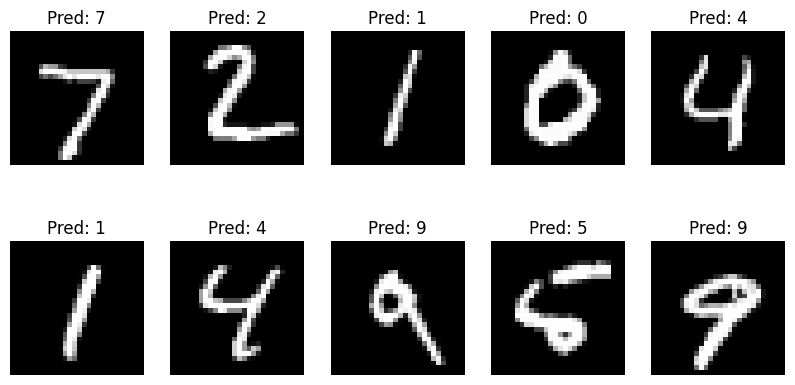

In [7]:
predict = model.predict(x_test)
plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='gray')
    plt.title("Pred: " + str(np.argmax(predict[i])))
    plt.axis('off')

plt.show()

# Plot Graphs

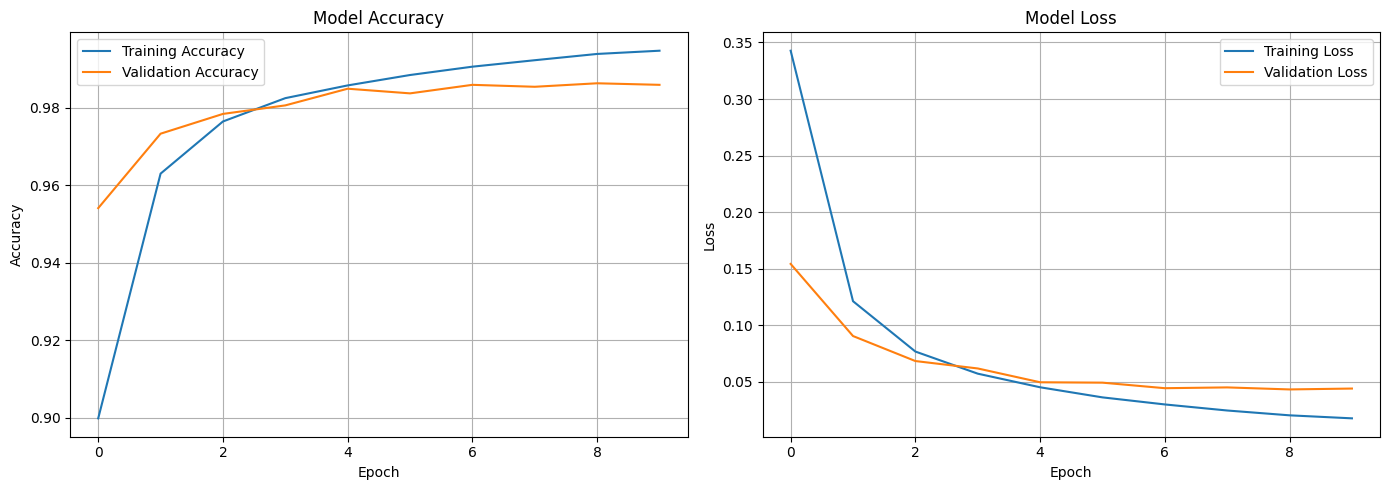

Test accuracy: 0.9859
Test loss: 0.0442


In [8]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))  
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test loss: {test_loss:.4f}')

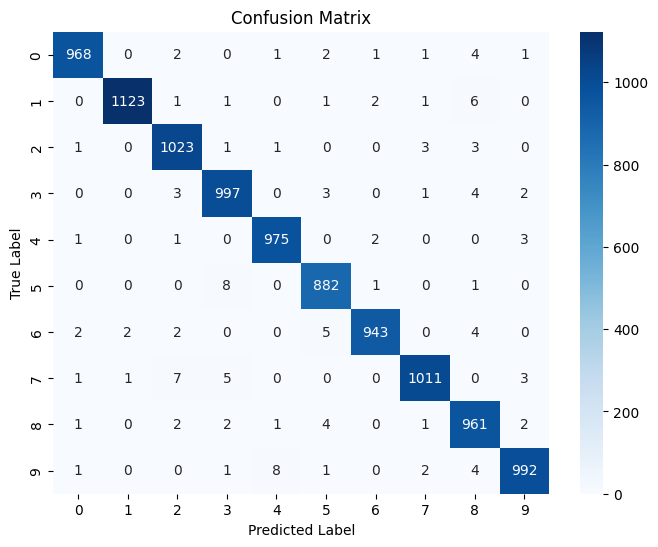

In [27]:
y_pred = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualizing Model

Filters shape: (5, 5, 1, 6)
Bias shape: (6,)


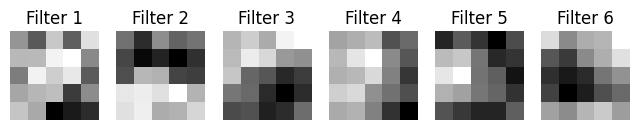

In [9]:
filters,bias = model.layers[0].get_weights()
print(f'Filters shape: {filters.shape}')
print(f'Bias shape: {bias.shape}')

f_min ,f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

plt.figure(figsize=(8,6))
for i in range(filters.shape[3]):
    plt.subplot(1,6,i+1)
    plt.imshow(filters[:,:,:,i], cmap='gray')
    plt.axis('off')
    plt.title(f'Filter {i+1}')
plt.show()

In [49]:
def visualize_feature_maps(model, img, layer_indices=None, max_cols=10, map_size=(2,2)):
    """
    Visualize feature maps for specified Conv2D layers of a model with consistent subplot sizes.

    Args:
        model: Keras model
        img: single image (H,W,C)
        layer_indices: list of Conv2D layer indices to visualize; if None, all Conv2D layers
        max_cols: maximum number of columns in the plot grid
        map_size: tuple (width, height) in inches for each feature map
    """
    # Ensure model is built
    _ = model(np.zeros((1, *img.shape)))
    
    # Get all Conv2D layers
    conv_layers = [layer for layer in model.layers if isinstance(layer, Conv2D)]
    if layer_indices is None:
        layer_indices = range(len(conv_layers))
    
    for idx in layer_indices:
        layer = conv_layers[idx]
        activation_model = Model(inputs=model.input, outputs=layer.output)
        activations = activation_model.predict(img.reshape(1, *img.shape))
        n_maps = activations.shape[-1]
        
        # Grid layout
        cols = min(max_cols, n_maps)
        rows = int(np.ceil(n_maps / cols))
        
        # Dynamic figure size
        fig_width = cols * map_size[0]
        fig_height = rows * map_size[1]
        plt.figure(figsize=(fig_width, fig_height))
        
        for i in range(n_maps):
            plt.subplot(rows, cols, i+1)
            plt.imshow(activations[0,:,:,i], cmap='viridis')
            plt.axis('off')
            plt.title(f'Map {i+1}', fontsize=9)
        
        plt.tight_layout()
        plt.suptitle(f'Layer {idx+1} Feature Maps', fontsize=14, y=1.02)
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


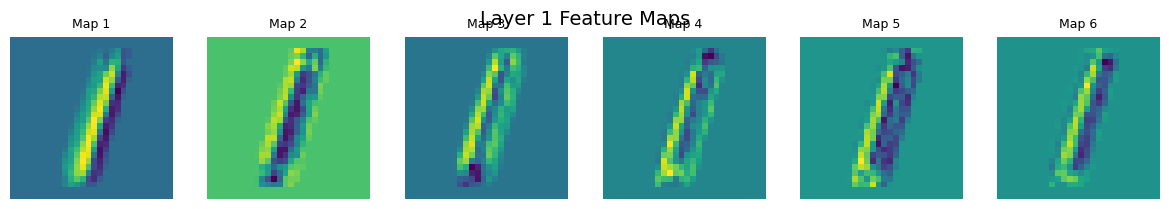

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


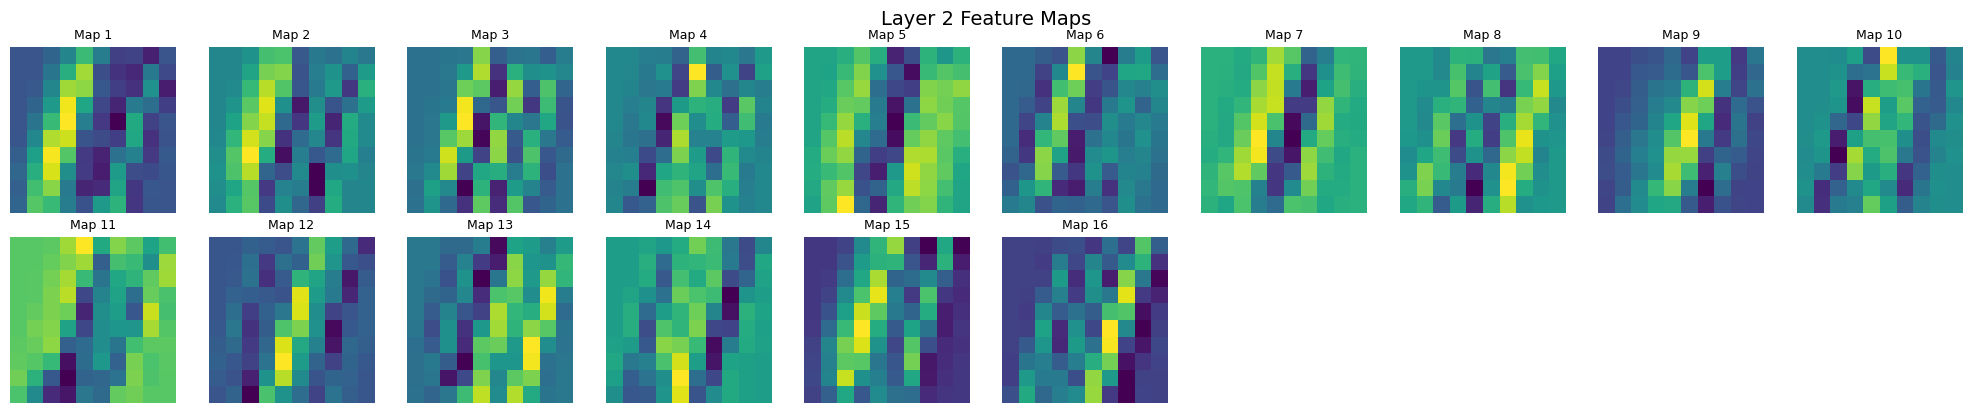

In [50]:
visualize_feature_maps(model, x_test[2])

In [51]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

# Save and Predict on New Data

In [54]:
model.save('mnist_cnn_model.h5')

In [55]:
img = cv2.imread('three.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
img = img.astype('float32') / 255.0
img = img.reshape(1, 28, 28, 1)

my_pred = model.predict(img)
digit = np.argmax(my_pred)
print("Predicted Digit:", digit)

cv2.imshow("Digit", cv2.resize(img[0], (200,200)))  
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Digit: 3
